In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data_1G = pd.read_csv("result2/result_1gb.csv")
data_2G = pd.read_csv("result2/result_2gb.csv")
data_5G = pd.read_csv("result2/result_5gb.csv")
data_10G = pd.read_csv("result2/result_10gb.csv")

In [3]:
data_1G.head(5)

,query,time1,time2,time3,time4,time5
0,1,5.181038,0.261020,0.413358,1.807294,0.634027
1,2,15.723119,3.035992,3.103088,2.692839,2.797734
2,3,0.120080,0.017026,0.016842,0.016855,0.016347
3,4,19.643598,0.891199,0.767158,0.992946,0.696766
4,5,0.908003,0.342647,0.327049,0.662048,1.180877


In [4]:
print("1GB Scale")
pd.DataFrame(pd.concat({"max":data_1G.max(),"min":data_1G.min(),"scale":data_1G.max()/data_1G.min()},axis=1))

1GB Scale


,max,min,scale
query,99.000000,1.000000,99.000000
time1,41.808875,0.017666,2366.615814
time2,18.509052,0.004750,3896.436057
time3,17.065320,0.005031,3391.960004
time4,16.461655,0.006030,2729.921873
time5,14.809966,0.004945,2995.057859


In [5]:
print("2GB Scale")
pd.DataFrame(pd.concat({"max":data_2G.max(),"min":data_2G.min(),"scale":data_2G.max()/data_2G.min()},axis=1))

2GB Scale


,max,min,scale
query,99.000000,1.000000,99.000000
time1,61.115456,0.059156,1033.116238
time2,32.349173,0.006942,4659.898513
time3,30.461488,0.006241,4880.801505
time4,42.275247,0.005974,7076.475157
time5,19.786131,0.007582,2609.636427


In [6]:
print("5GB Scale")
pd.DataFrame(pd.concat({"max":data_5G.max(),"min":data_5G.min(),"scale":data_5G.max()/data_5G.min()},axis=1))

5GB Scale


,max,min,scale
query,99.000000,1.000000,99.000000
time1,596.796506,0.067097,8894.540187
time2,602.024528,0.023841,25251.748930
time3,422.252667,0.022009,19185.545227
time4,316.112662,0.023874,13240.850881
time5,319.884655,0.023936,13364.146511


In [7]:
print("10GB Scale")
pd.DataFrame(pd.concat({"max":data_10G.max(),"min":data_10G.min(),"scale":data_10G.max()/data_10G.min()},axis=1))

10GB Scale


,max,min,scale
query,99.000000,1.000000,99.000000
time1,1424.581786,0.124309,11460.021372
time2,1414.809220,0.033802,41855.744061
time3,1573.431468,0.035620,44172.433435
time4,1537.649211,0.032040,47991.727023
time5,1492.756058,0.031936,46742.213118


## 1. Average without First Run (Last 4)
Because the last 4 times have the query plan, so their time may be much faster than the first run.

In [8]:
data_1G_Average_4 = pd.DataFrame(data_1G[["time2","time3","time4","time5"]].mean(axis=1)).rename({0:"Average_4_1G"},axis = 1)
data_2G_Average_4 = pd.DataFrame(data_2G[["time2","time3","time4","time5"]].mean(axis=1)).rename({0:"Average_4_2G"},axis = 1)
data_5G_Average_4 = pd.DataFrame(data_5G[["time2","time3","time4","time5"]].mean(axis=1)).rename({0:"Average_4_5G"},axis = 1)
data_10G_Average_4 = pd.DataFrame(data_10G[["time2","time3","time4","time5"]].mean(axis=1)).rename({0:"Average_4_10G"},axis = 1)

In [9]:
Average_4 = pd.concat([data_1G_Average_4,data_2G_Average_4,data_5G_Average_4,data_10G_Average_4],axis=1)

In [10]:
Average_4

,Average_4_1G,Average_4_2G,Average_4_5G,Average_4_10G
0,0.778925,0.611597,0.845893,3.255190
1,2.907413,5.506025,96.846542,171.160425
2,0.016768,0.035826,0.105011,0.074753
3,0.837017,1.502923,66.084880,296.571171
4,0.628155,0.562149,133.339013,162.024232
...,...,...,...,...
94,0.452475,1.670682,0.556187,1.300620
95,0.088875,0.204339,0.340989,91.948513
96,0.374639,0.706645,61.873742,124.011733
97,0.113881,0.140733,0.407568,1.092861


In [11]:
sns.set()

In [12]:
Average_4_1G_mean = Average_4["Average_4_1G"].mean(axis = 0)
Average_4_2G_mean = Average_4["Average_4_2G"].mean(axis = 0)
Average_4_5G_mean = Average_4["Average_4_5G"].mean(axis = 0)
Average_4_10G_mean = Average_4["Average_4_10G"].mean(axis = 0)

Average_4_1G_q1 = Average_4["Average_4_1G"].quantile(0.25)
Average_4_2G_q1 = Average_4["Average_4_2G"].quantile(0.25)
Average_4_5G_q1 = Average_4["Average_4_5G"].quantile(0.25)
Average_4_10G_q1 = Average_4["Average_4_10G"].quantile(0.25)

Average_4_1G_q3 = Average_4["Average_4_1G"].quantile(0.75)
Average_4_2G_q3 = Average_4["Average_4_2G"].quantile(0.75)
Average_4_5G_q3 = Average_4["Average_4_5G"].quantile(0.75)
Average_4_10G_q3 = Average_4["Average_4_10G"].quantile(0.75)

Average_4_1G_toplim = Average_4_1G_q3 + 1.5*(Average_4_1G_q3 - Average_4_1G_q1)
Average_4_2G_toplim = Average_4_2G_q3 + 1.5*(Average_4_2G_q3 - Average_4_2G_q1)
Average_4_5G_toplim = Average_4_5G_q3 + 1.5*(Average_4_5G_q3 - Average_4_5G_q1)
Average_4_10G_toplim = Average_4_10G_q3 + 1.5*(Average_4_10G_q3 - Average_4_10G_q1)



In [13]:
Record_1G = []
Record_2G = []
Record_5G = []
Record_10G = []

for i,item in enumerate(Average_4["Average_4_1G"]):
    if item > Average_4_1G_toplim:
        Record_1G.append((i+1,item))
        
for i,item in enumerate(Average_4["Average_4_2G"]):
    if item > Average_4_2G_toplim:
        Record_2G.append((i+1,item))
        
for i,item in enumerate(Average_4["Average_4_5G"]):
    if item > Average_4_5G_toplim:
        Record_5G.append((i+1,item))
        
for i,item in enumerate(Average_4["Average_4_10G"]):
    if item > Average_4_10G_toplim:
        Record_10G.append((i+1,item))

In [14]:
Record_5G.sort(key=lambda x:x[1],reverse=True)

In [96]:
Record_5G

[(23, 415.0686281323433),
 (14, 285.84077125787735),
 (10, 153.61627680063248),
 (75, 134.7548030614853),
 (5, 133.33901292085648),
 (28, 102.64760720729828),
 (69, 98.32404655218124),
 (2, 96.84654158353806),
 (58, 91.51659494638443),
 (38, 89.99126017093658),
 (60, 89.52467238903046),
 (35, 88.52850246429443),
 (33, 84.60934191942215),
 (76, 77.41297721862793),
 (77, 77.23369199037552),
 (78, 76.2590925693512),
 (87, 74.3105617761612),
 (4, 66.08488029241562),
 (74, 63.27398443222046),
 (97, 61.873742163181305),
 (80, 57.10478949546814)]

## Boxplot

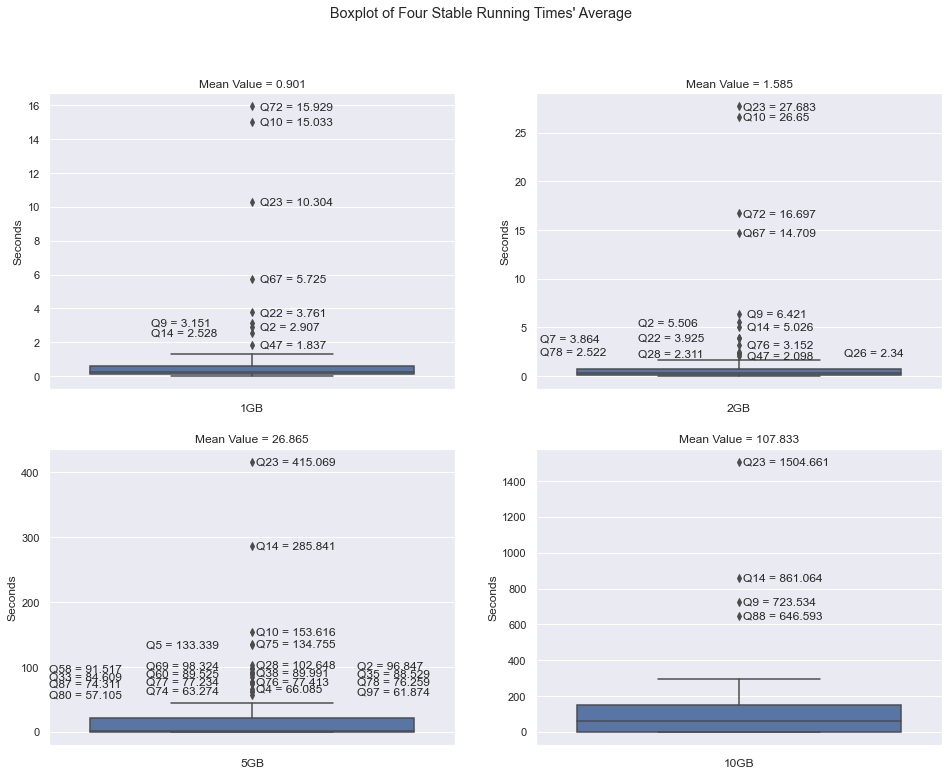

In [21]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (16,12))
fig.suptitle("Boxplot of Four Stable Running Times' Average")


sns.boxplot(ax=ax1,y = Average_4["Average_4_1G"])
sns.boxplot(ax=ax2,y = Average_4["Average_4_2G"])
sns.boxplot(ax=ax3,y = Average_4["Average_4_5G"])
sns.boxplot(ax=ax4,y = Average_4["Average_4_10G"])

ax1.set(xlabel= "1GB",ylabel="Seconds",title=f"Mean Value = {np.round(Average_4_1G_mean,3)}")
ax2.set(xlabel= "2GB",ylabel="Seconds",title=f"Mean Value = {np.round(Average_4_2G_mean,3)}")
ax3.set(xlabel= "5GB",ylabel="Seconds",title=f"Mean Value = {np.round(Average_4_5G_mean,3)}")
ax4.set(xlabel= "10GB",ylabel="Seconds",title=f"Mean Value = {np.round(Average_4_10G_mean,3)}")

for tup in Record_1G:
    if tup[0] ==9 or tup[0] == 14:
        ax1.text(-0.25,tup[1],f"Q{tup[0]} = {np.round(tup[1],3)}",ha='left', va='center')
    else:
        ax1.text(0.02,tup[1],f"Q{tup[0]} = {np.round(tup[1],3)}",ha='left', va='center')
        
for i,tup in enumerate(Record_2G):
    if tup[0] in [23,10,72,67]:
        ax2.text(0.01,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [2,22,28]:
        ax2.text(-0.25,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [26]:
        ax2.text(0.26,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [78,7]:
        ax2.text(-0.49,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    else:
        ax2.text(0.02,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')


        
for i,tup in enumerate(Record_5G):
    if tup[0] in [23,14,10,75]:
        ax3.text(0.01,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [5]:
        ax3.text(-0.26,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [28,38,76,4]:
        ax3.text(0.01,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [35,78,97]:
        ax3.text(0.26,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [2]:
        ax3.text(0.26,tup[1]+4,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
        
    elif tup[0] in [60,77,74]:
        ax3.text(-0.26,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
        
    elif tup[0] in [69]:
        ax3.text(-0.26,tup[1]+3,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
        
        
    elif tup[0] in [33,87,80]:
        ax3.text(-0.50,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    
    elif tup[0] in [58]:
        ax3.text(-0.50,tup[1]+5,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
        
for i,tup in enumerate(Record_10G):
    
    ax4.text(0.01,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    

In [26]:
fig.savefig("Boxplot_Average4.jpg")

## Histplot

[Text(0.5, 0, 'Seconds'), Text(0.5, 1.0, '10GB')]

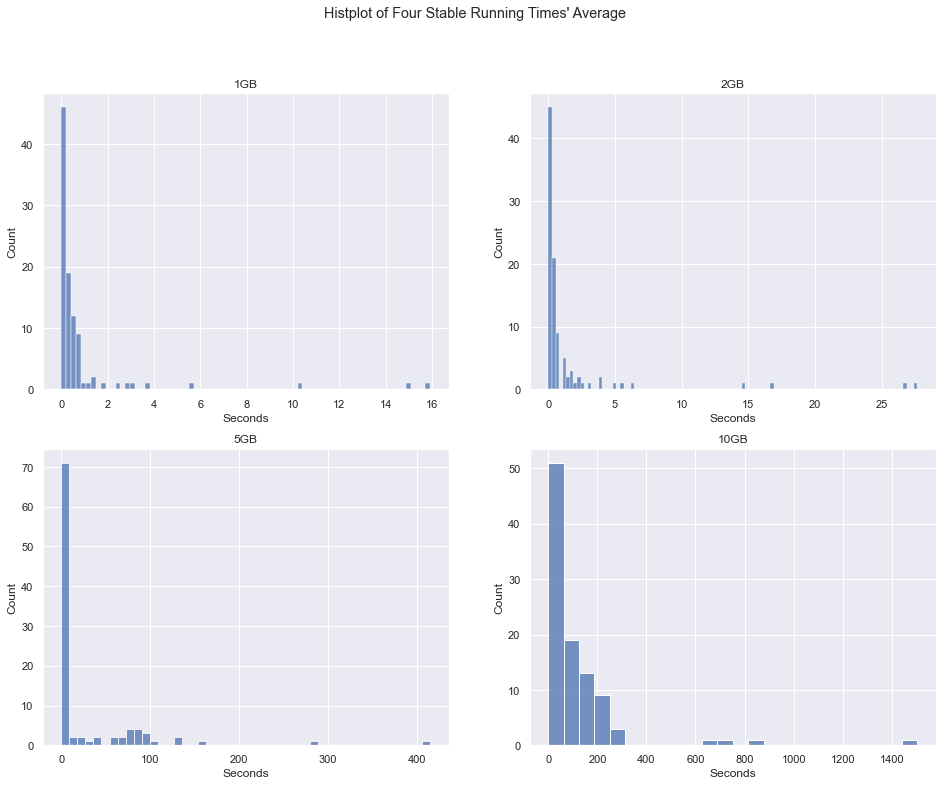

In [94]:
fig3,((ax11,ax22),(ax33,ax44)) = plt.subplots(2,2,figsize = (16,12))
fig3.suptitle("Histplot of Four Stable Running Times' Average")

sns.histplot(ax=ax11,data = Average_4["Average_4_1G"])
sns.histplot(ax=ax22,data = Average_4["Average_4_2G"])
sns.histplot(ax=ax33,data = Average_4["Average_4_5G"])
sns.histplot(ax=ax44,data = Average_4["Average_4_10G"])

ax11.set(xlabel= "Seconds",title=f"1GB")
ax22.set(xlabel= "Seconds",title=f"2GB")
ax33.set(xlabel= "Seconds",title=f"5GB")
ax44.set(xlabel= "Seconds",title=f"10GB")

In [95]:
fig3.savefig("Histplot_Average4.jpg")

## Heatmap

In [97]:
Average_4

,Average_4_1G,Average_4_2G,Average_4_5G,Average_4_10G
0,0.778925,0.611597,0.845893,3.255190
1,2.907413,5.506025,96.846542,171.160425
2,0.016768,0.035826,0.105011,0.074753
3,0.837017,1.502923,66.084880,296.571171
4,0.628155,0.562149,133.339013,162.024232
...,...,...,...,...
94,0.452475,1.670682,0.556187,1.300620
95,0.088875,0.204339,0.340989,91.948513
96,0.374639,0.706645,61.873742,124.011733
97,0.113881,0.140733,0.407568,1.092861


In [106]:
log10_Average4 = np.log10(Average_4).set_index(pd.Index([f"Q{i}" for i in range(1,100)]))
log10_Average4 = log10_Average4.rename({"Average_4_1G":"1G",
                      "Average_4_2G":"2G",
                      "Average_4_5G":"5G",
                      "Average_4_10G":"10G"},axis=1)
log10_Average4

,1G,2G,5G,10G
Q1,-0.108505,-0.213534,-0.072684,0.512576
Q2,0.463507,0.740838,1.986084,2.233403
Q3,-1.775530,-1.445802,-0.978765,-1.126369
Q4,-0.077266,0.176937,1.820102,2.472129
Q5,-0.201933,-0.250149,2.124957,2.209580
...,...,...,...,...
Q95,-0.344405,0.222894,-0.254779,0.114150
Q96,-1.051223,-0.689649,-0.467259,1.963545
Q97,-0.426387,-0.150799,1.791506,2.093463
Q98,-0.943549,-0.851603,-0.389800,0.038565


D:\Anaconda3\envs\ADA\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  from ipykernel import kernelapp as app


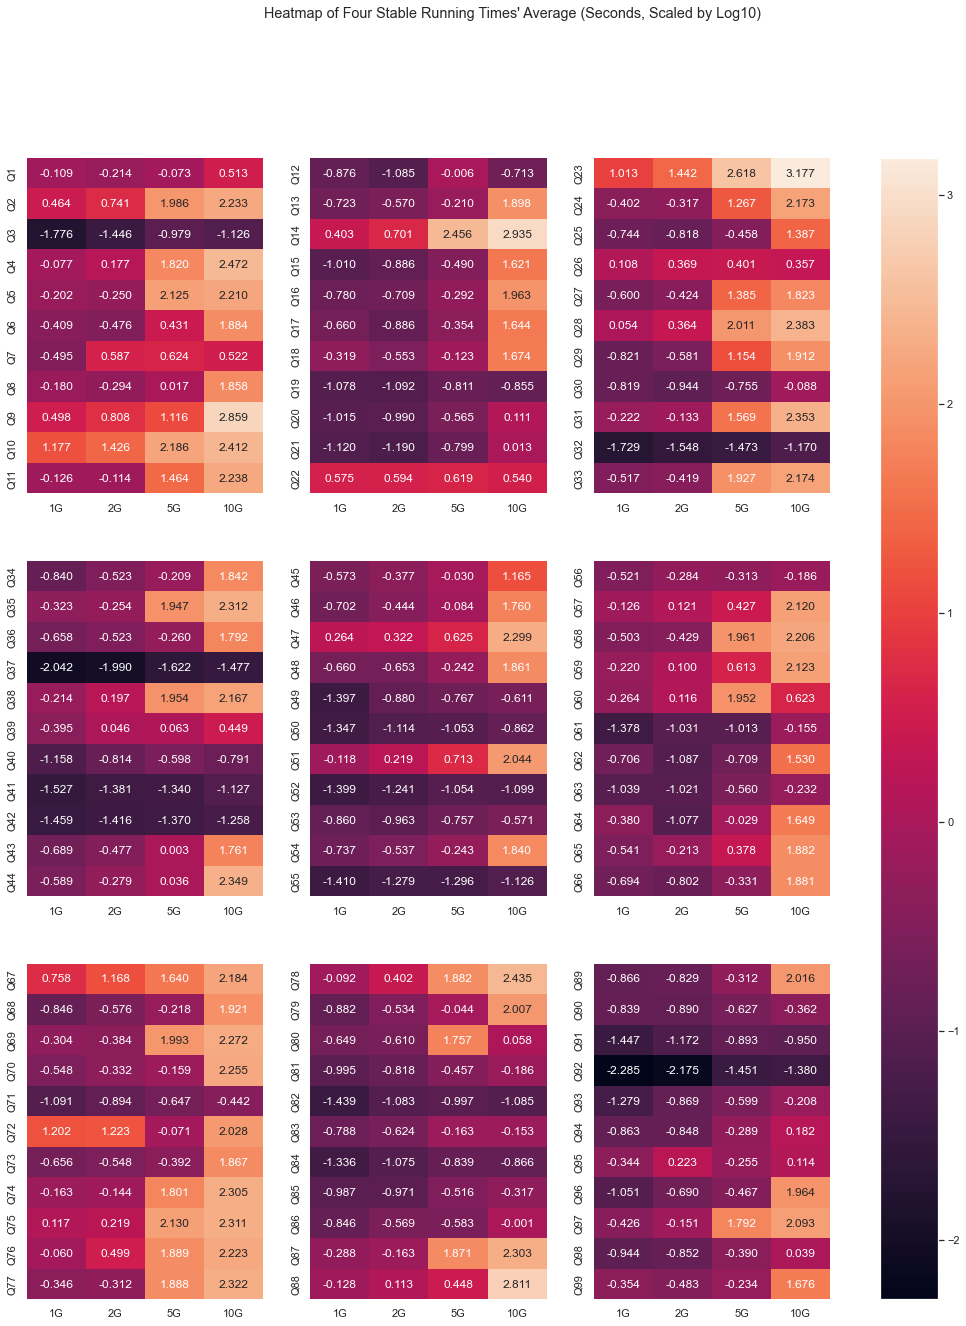

In [107]:
v_min = log10_Average4.values.min()
v_max = log10_Average4.values.max()

fig4,axes = plt.subplots(3,3,figsize = (18,21))

fig4.suptitle("Heatmap of Four Stable Running Times' Average (Seconds, Scaled by Log10)")
for i,ax in enumerate(axes.flat):
    if i ==0:
        im = sns.heatmap(data=log10_Average4.iloc[i*11:(i+1)*11],ax=ax,annot=True,vmin=v_min,vmax=v_max,cbar=False,fmt=".3f")
    else:
        sns.heatmap(data=log10_Average4.iloc[i*11:(i+1)*11],ax=ax,annot=True,vmin=v_min,vmax=v_max,cbar=False,fmt=".3f")
        
    if i==8:
        mappable = im.get_children()[0]
        plt.colorbar(mappable, ax = list(axes.flat),orientation = 'vertical')

In [109]:
data_10G.iloc[22]

query      23.000000
time1    1424.581786
time2    1414.809220
time3    1573.431468
time4    1537.649211
time5    1492.756058
Name: 22, dtype: float64

In [110]:
fig4.savefig("Heatmap_Average4.jpg")

## 2. Only the First Run

In [66]:
data_1G_First = pd.DataFrame(data_1G[["time1"]]).rename({"time1":"1G"},axis = 1)
data_2G_First = pd.DataFrame(data_2G[["time1"]]).rename({"time1":"2G"},axis = 1)
data_5G_First = pd.DataFrame(data_5G[["time1"]]).rename({"time1":"5G"},axis = 1)
data_10G_First = pd.DataFrame(data_10G[["time1"]]).rename({"time1":"10G"},axis = 1)

data_First = pd.concat([data_1G_First,data_2G_First,data_5G_First,data_10G_First],axis=1)
data_First

,1G,2G,5G,10G
0,5.181038,4.542759,2.857860,27.925536
1,15.723119,20.459758,141.676535,241.575337
2,0.120080,1.875101,5.653978,3.908838
3,19.643598,14.952736,155.952579,402.319770
4,0.908003,5.150846,32.542078,181.731530
...,...,...,...,...
94,0.460380,2.152820,3.207527,5.144489
95,0.103499,0.196672,26.688194,84.605890
96,0.469485,0.820316,66.537468,161.254667
97,0.112568,0.175008,0.515264,25.965841


In [67]:
log10_data_First = np.log10(data_First).set_index(pd.Index([f"Q{i}" for i in range(1,100)]))
log10_data_First

,1G,2G,5G,10G
Q1,0.714417,0.657320,0.456041,1.446002
Q2,1.196539,1.310900,2.151298,2.383053
Q3,-0.920528,0.273025,0.752354,0.592048
Q4,1.293221,1.174721,2.192993,2.604571
Q5,-0.041913,0.711879,1.512445,2.259430
...,...,...,...,...
Q95,-0.336883,0.333008,0.506170,0.711342
Q96,-0.985064,-0.706258,1.426319,1.927401
Q97,-0.328378,-0.086019,1.823066,2.207512
Q98,-0.948585,-0.756942,-0.287970,1.414402


## Heatmap

In [68]:
v_min = log10_data_First.values.min()
v_max = log10_data_First.values.max()

D:\Anaconda3\envs\ADA\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


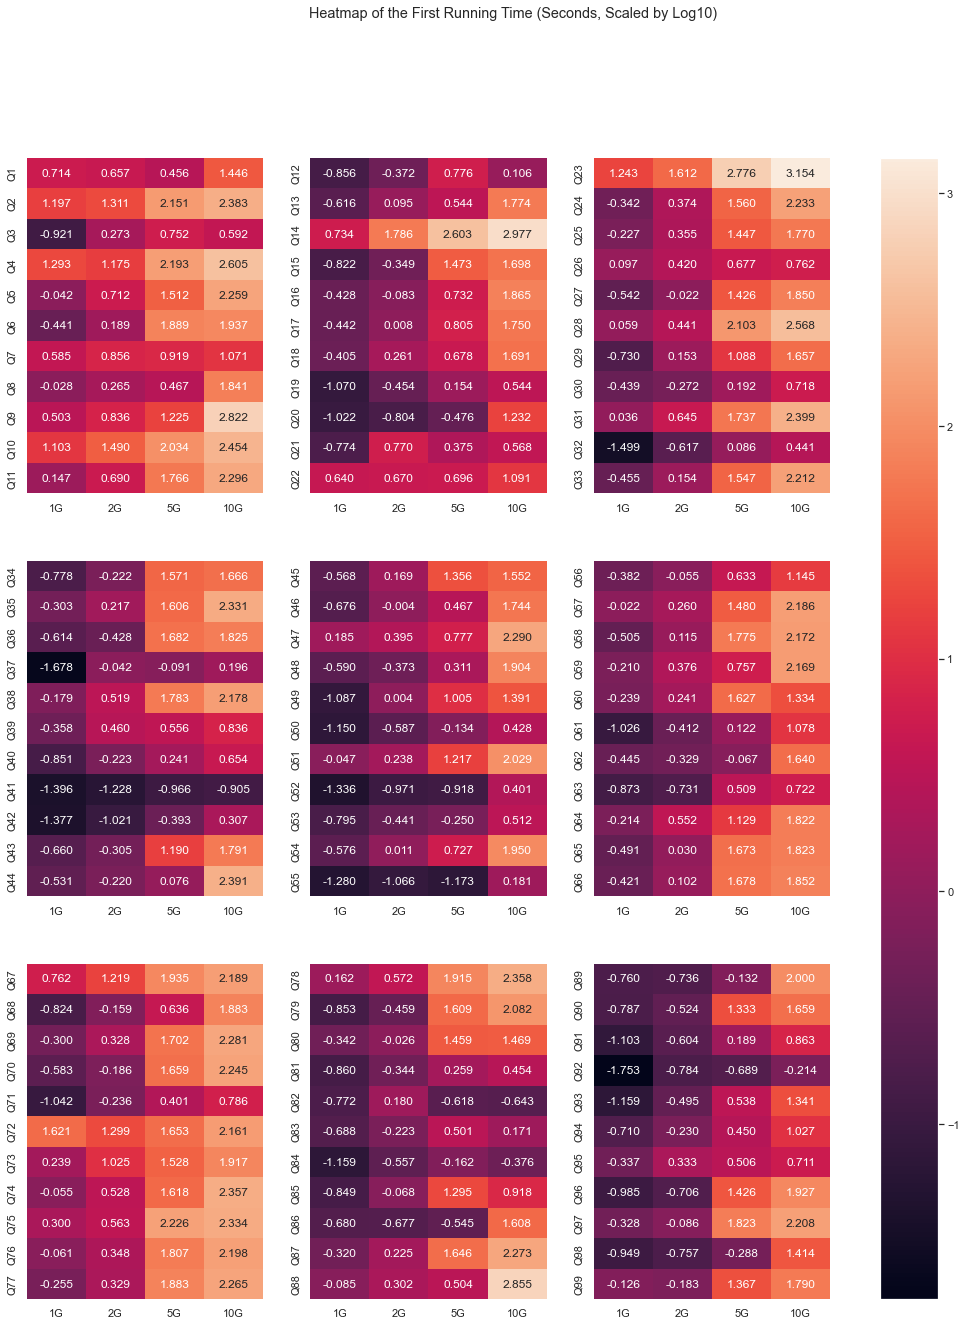

In [79]:
fig2,axes = plt.subplots(3,3,figsize = (18,21))

fig2.suptitle("Heatmap of the First Running Time (Seconds, Scaled by Log10)")
for i,ax in enumerate(axes.flat):
    if i ==0:
        im = sns.heatmap(data=log10_data_First.iloc[i*11:(i+1)*11],ax=ax,annot=True,vmin=v_min,vmax=v_max,cbar=False,fmt=".3f")
    else:
        sns.heatmap(data=log10_data_First.iloc[i*11:(i+1)*11],ax=ax,annot=True,vmin=v_min,vmax=v_max,cbar=False,fmt=".3f")
        
    if i==8:
        mappable = im.get_children()[0]
        plt.colorbar(mappable, ax = list(axes.flat),orientation = 'vertical')
        
    

    

In [76]:
?plt.colorbar

In [86]:
fig2.savefig("Heatmap_First.jpg")

## Histplot

[Text(0.5, 0, 'Seconds'), Text(0.5, 1.0, '10GB')]

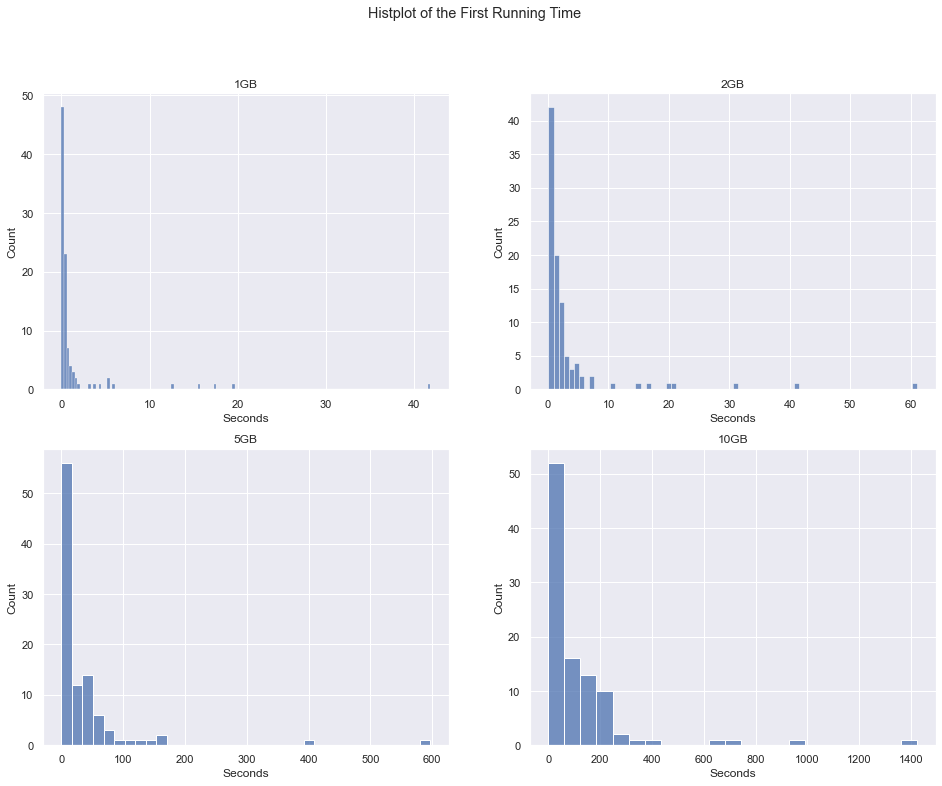

In [111]:
fig5,((ax11,ax22),(ax33,ax44)) = plt.subplots(2,2,figsize = (16,12))
fig5.suptitle("Histplot of the First Running Time")

sns.histplot(ax=ax11,data = data_First["1G"])
sns.histplot(ax=ax22,data = data_First["2G"])
sns.histplot(ax=ax33,data = data_First["5G"])
sns.histplot(ax=ax44,data = data_First["10G"])

ax11.set(xlabel= "Seconds",title=f"1GB")
ax22.set(xlabel= "Seconds",title=f"2GB")
ax33.set(xlabel= "Seconds",title=f"5GB")
ax44.set(xlabel= "Seconds",title=f"10GB")

In [113]:
fig5.savefig("Histplot_First.jpg")

## Boxplot

In [114]:
data_First

,1G,2G,5G,10G
0,5.181038,4.542759,2.857860,27.925536
1,15.723119,20.459758,141.676535,241.575337
2,0.120080,1.875101,5.653978,3.908838
3,19.643598,14.952736,155.952579,402.319770
4,0.908003,5.150846,32.542078,181.731530
...,...,...,...,...
94,0.460380,2.152820,3.207527,5.144489
95,0.103499,0.196672,26.688194,84.605890
96,0.469485,0.820316,66.537468,161.254667
97,0.112568,0.175008,0.515264,25.965841


In [115]:
data_First_1G_mean = data_First["1G"].mean(axis = 0)
data_First_2G_mean = data_First["2G"].mean(axis = 0)
data_First_5G_mean = data_First["5G"].mean(axis = 0)
data_First_10G_mean = data_First["10G"].mean(axis = 0)

data_First_1G_q1 = data_First["1G"].quantile(0.25)
data_First_2G_q1 = data_First["2G"].quantile(0.25)
data_First_5G_q1 = data_First["5G"].quantile(0.25)
data_First_10G_q1 = data_First["10G"].quantile(0.25)

data_First_1G_q3 = data_First["1G"].quantile(0.75)
data_First_2G_q3 = data_First["2G"].quantile(0.75)
data_First_5G_q3 = data_First["5G"].quantile(0.75)
data_First_10G_q3 = data_First["10G"].quantile(0.75)

data_First_1G_toplim = data_First_1G_q3 + 1.5*(data_First_1G_q3 - data_First_1G_q1)
data_First_2G_toplim = data_First_2G_q3 + 1.5*(data_First_2G_q3 - data_First_2G_q1)
data_First_5G_toplim = data_First_5G_q3 + 1.5*(data_First_5G_q3 - data_First_5G_q1)
data_First_10G_toplim = data_First_10G_q3 + 1.5*(data_First_10G_q3 - data_First_10G_q1)

In [116]:
Record_1G = []
Record_2G = []
Record_5G = []
Record_10G = []

for i,item in enumerate(data_First["1G"]):
    if item > data_First_1G_toplim:
        Record_1G.append((i+1,item))
        
for i,item in enumerate(data_First["2G"]):
    if item > data_First_2G_toplim:
        Record_2G.append((i+1,item))
        
for i,item in enumerate(data_First["5G"]):
    if item > data_First_5G_toplim:
        Record_5G.append((i+1,item))
        
for i,item in enumerate(data_First["10G"]):
    if item > data_First_10G_toplim:
        Record_10G.append((i+1,item))

In [136]:
Record_5G.sort(key=lambda x: x[1],reverse=True)
Record_5G

[(23, 596.7965059280396),
 (14, 401.1364748477936),
 (75, 168.3717520236969),
 (4, 155.95257878303528),
 (2, 141.67653512954712),
 (28, 126.90303802490234),
 (10, 108.15175914764404)]

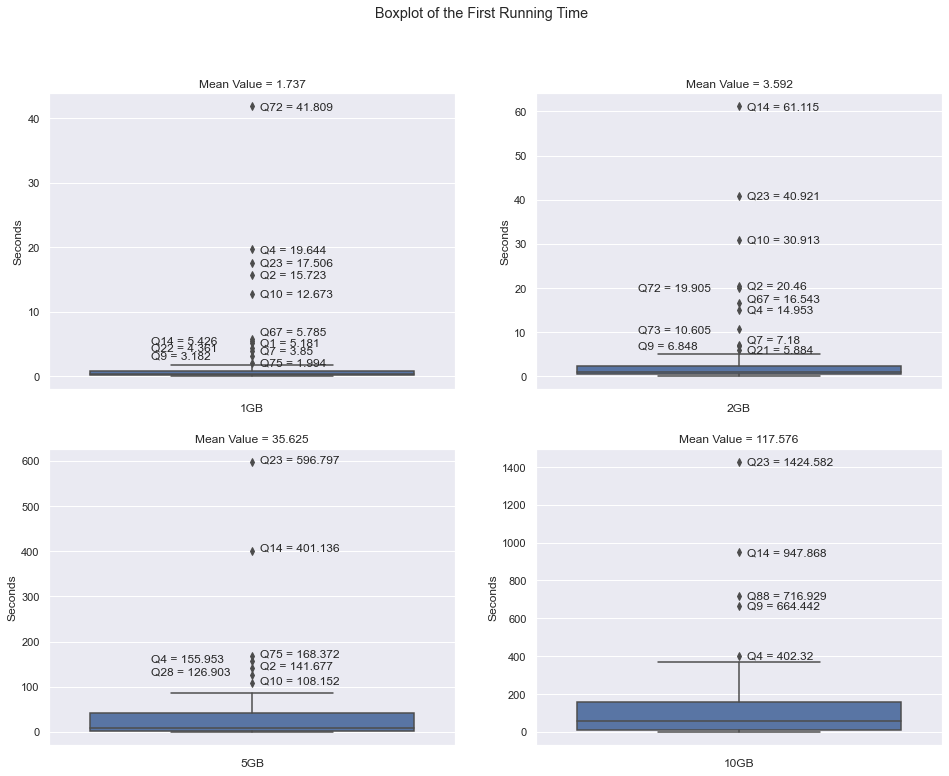

In [137]:
fig6,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (16,12))
fig6.suptitle("Boxplot of the First Running Time")


sns.boxplot(ax=ax1,y = data_First["1G"])
sns.boxplot(ax=ax2,y =data_First["2G"])
sns.boxplot(ax=ax3,y = data_First["5G"])
sns.boxplot(ax=ax4,y = data_First["10G"])

ax1.set(xlabel= "1GB",ylabel="Seconds",title=f"Mean Value = {np.round(data_First_1G_mean,3)}")
ax2.set(xlabel= "2GB",ylabel="Seconds",title=f"Mean Value = {np.round(data_First_2G_mean,3)}")
ax3.set(xlabel= "5GB",ylabel="Seconds",title=f"Mean Value = {np.round(data_First_5G_mean,3)}")
ax4.set(xlabel= "10GB",ylabel="Seconds",title=f"Mean Value = {np.round(data_First_10G_mean,3)}")

for tup in Record_1G:
     if tup[0] in [72,4,23,2,10,1,7,75]:
        ax1.text(0.02,tup[1],f"Q{tup[0]} = {np.round(tup[1],3)}",ha='left', va='center')
     elif tup[0] in [14,22,9]:
        ax1.text(-0.25,tup[1],f"Q{tup[0]} = {np.round(tup[1],3)}",ha='left', va='center')
     elif tup[0] in [67]:
        ax1.text(0.02,tup[1]+1,f"Q{tup[0]} = {np.round(tup[1],3)}",ha='left', va='center')
        
        
for i,tup in enumerate(Record_2G):
    if tup[0] in [14,23,10,2,4,21]:
        ax2.text(0.02,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    elif tup[0] in [67,7]:
        ax2.text(0.02,tup[1]+1,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    else:
        ax2.text(-0.25,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')


        
for i,tup in enumerate(Record_5G):
    if tup[0] in [23,14,75,2,10]:
        ax3.text(0.02,tup[1]+5,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    else:
        ax3.text(-0.25,tup[1]+5,f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
        
for i,tup in enumerate(Record_10G):
    
    ax4.text(0.02,tup[1],f"Q{tup[0]} = {round(tup[1],3)}",ha='left', va='center')
    

In [138]:
fig6.savefig("Boxplot_First.jpg")

## Across all the data size

In [152]:
sum_4 = Average_4.sum(axis = 0).rename({"Average_4_1G":"1G",
                                       "Average_4_2G":"2G",
                                       "Average_4_5G":"5G",
                                       "Average_4_10G":"10G"})
sum_4

1G        89.243565
2G       156.868407
5G      2659.603575
10G    10675.470347
dtype: float64

In [153]:
sum_first = data_First.sum(axis = 0)
sum_first

1G       171.915768
2G       355.631292
5G      3526.880348
10G    11640.053206
dtype: float64

In [166]:
d = pd.concat([sum_4,sum_first],axis = 1).T.set_index(pd.Index(["Average of Four Stable Runnings","The First Running"]))

In [169]:
d

,1G,2G,5G,10G
Average of Four Stable Runnings,89.243565,156.868407,2659.603575,10675.470347
The First Running,171.915768,355.631292,3526.880348,11640.053206


Text(0, 0.5, 'Seconds')

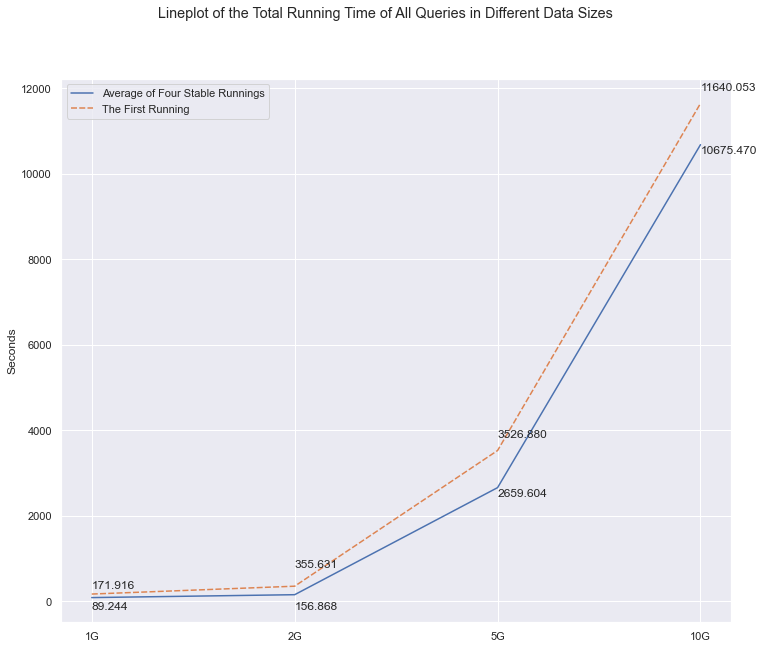

In [184]:
fig7,ax = plt.subplots(1,1,figsize = (12,10))
fig7.suptitle("Lineplot of the Total Running Time of All Queries in Different Data Sizes")

sns.lineplot(data = d.T,ax=ax)

ax.text(x="1G",y=-200,s="89.244")
ax.text(x="1G",y=300,s="171.916")

ax.text(x="2G",y=-200,s="156.868")
ax.text(x="2G",y=800,s="355.631")

ax.text(x="5G",y=2459,s="2659.604")
ax.text(x="5G",y=3826,s="3526.880")

ax.text(x="10G",y=10475,s="10675.470")
ax.text(x="10G",y=11940,s="11640.053")

ax.set_ylabel("Seconds")

In [185]:
fig7.savefig("Lineplot.jpg")